4168


(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

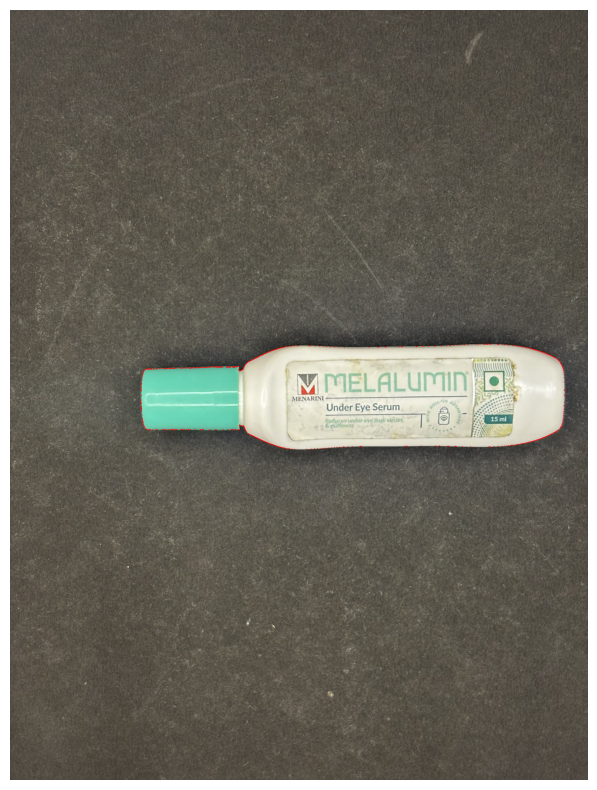

In [17]:
from contour import detect_contour_threshold, detect_edges_and_contours, detect_edges_and_dilate
import matplotlib.pyplot as plt
import cv2

img = cv2.imread(r'c:\Users\melroy.pereira1\OneDrive - Autoliv\Documents\lab_images\IMG_3839.jpeg')
det_cnt = detect_contour_threshold(img)
print(len(det_cnt))
biggest_cnt = max(det_cnt, key=cv2.contourArea)
cv2.drawContours(img, biggest_cnt, -1, (0, 0, 255), 3)  # to check all contours
plt.figure(figsize=[10,10])
plt.imshow(img[:,:,::-1]);plt.axis("off")


(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

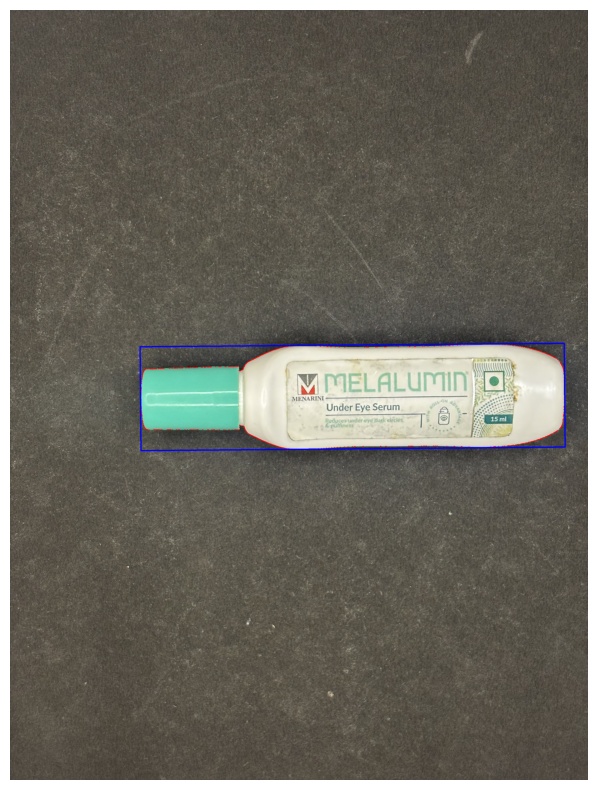

In [101]:
rect  = cv2. minAreaRect(biggest_cnt) 
#convert the rect object to box points  
box = cv2.boxPoints(rect).astype('int')    # min area rect will have angle , this line of code rotate at that angle and find new cordinates [int is used to draw rectangle ]
cv2.drawContours(img,[box], 0, (255,0,0), 5)

plt.figure(figsize=[10,10])
plt.imshow(img[:,:,::-1]);plt.axis("off")

(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

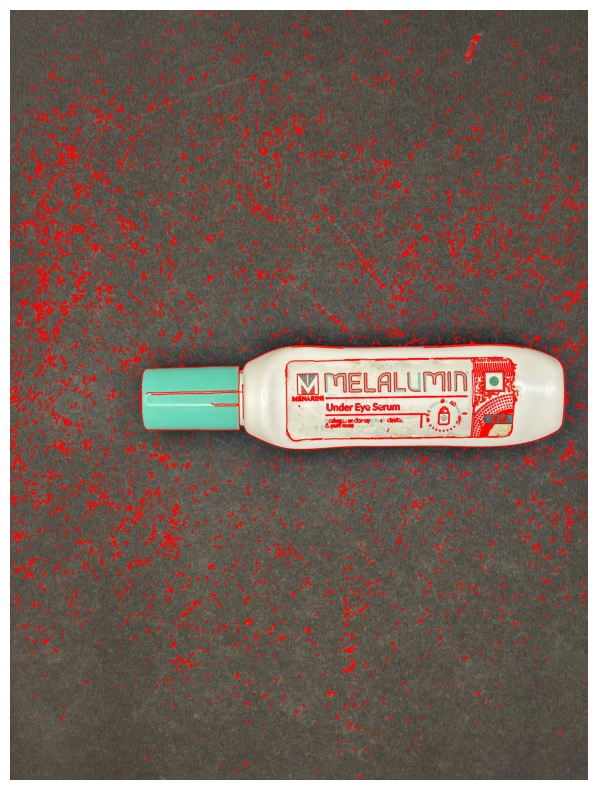

In [20]:
#lets try with edge detection 

img = cv2.imread(r'c:\Users\melroy.pereira1\OneDrive - Autoliv\Documents\lab_images\IMG_3839.jpeg')
det_cnt = detect_edges_and_contours(img, blur_kernel=(3, 3), canny_thresh1=50, canny_thresh2=150)
# biggest_cnt = max_cnt = max(det_cnt, key=cv2.contourArea)
cv2.drawContours(img, det_cnt, -1, (0, 0, 255), 3)  # to check all contours
plt.figure(figsize=[10,10])
plt.imshow(img[:,:,::-1]);plt.axis("off")



In [21]:
def find_best_matching_contour(contours, template_contour):
    best_match = None
    lowest_score = float('inf')

    for cnt in contours:
        # Match shapes (Hu Moments); method=1 is one of the recommended ones
        score = cv2.matchShapes(template_contour, cnt, cv2.CONTOURS_MATCH_I1, 0.0)
        
        if score < lowest_score:
            lowest_score = score
            best_match = cnt
    
    return best_match, lowest_score

(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

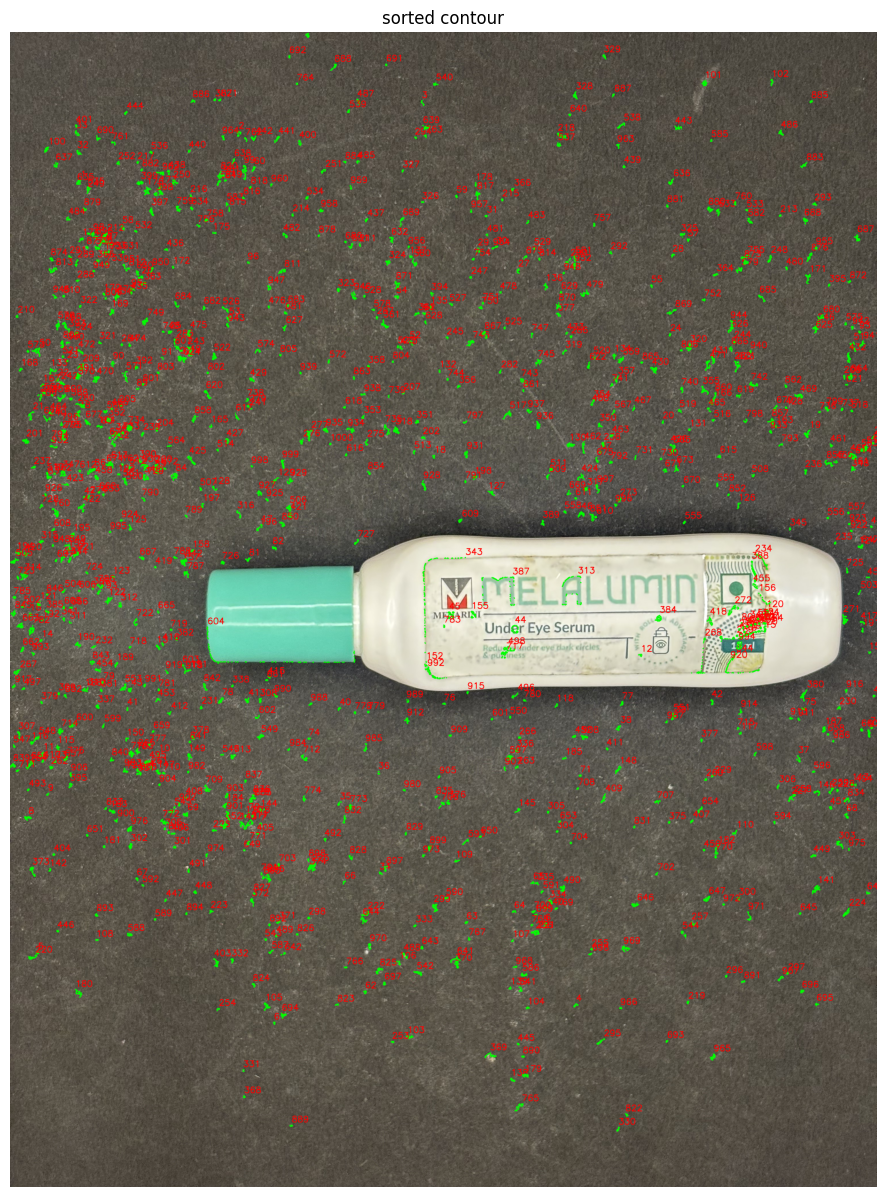

In [78]:
img = cv2.imread(r'c:\Users\melroy.pereira1\OneDrive - Autoliv\Documents\lab_images\IMG_3839.jpeg')

det_cnt = detect_edges_and_contours(img, blur_kernel=(3, 3), canny_thresh1=50, canny_thresh2=150)

#sort the contours in decreasing order
sorted_contours = sorted(det_cnt, key=cv2.contourArea, reverse=True)

for i, cont in enumerate(sorted_contours[1000:2000],1):  # t[:3] top 3

    #draw the contours
    cv2.drawContours(img, cont, -1, (0,255,0), 3)

    #Display the position of contour in sorted list
    cv2.putText(img, str(i), (cont[0,0,0], cont[0,0,1]-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255),2)

#Display the result
plt.figure(figsize=[15,15])
plt.imshow(img[:,:,::-1]);plt.title("sorted contour");plt.axis('off')


(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

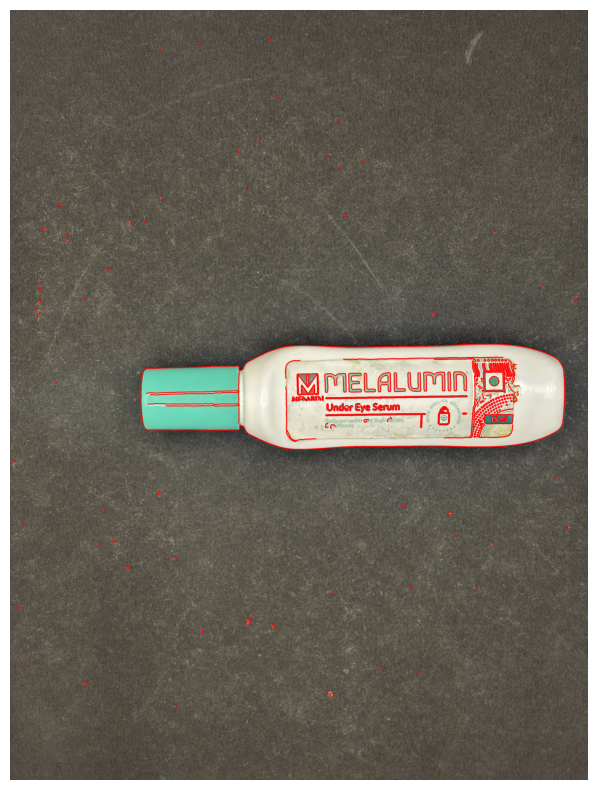

In [ ]:
#lets try with edge detection 

img = cv2.imread(r'c:\Users\melroy.pereira1\OneDrive - Autoliv\Documents\lab_images\IMG_3839.jpeg')
det_cnt = detect_edges_and_contours(img, blur_kernel=(15, 15), canny_thresh1=30, canny_thresh2=90)
cv2.drawContours(img, det_cnt, -1, (0, 0, 255), 3)  # to check all contours

plt.figure(figsize=[10,10])
plt.imshow(img[:,:,::-1]);plt.axis("off")

(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

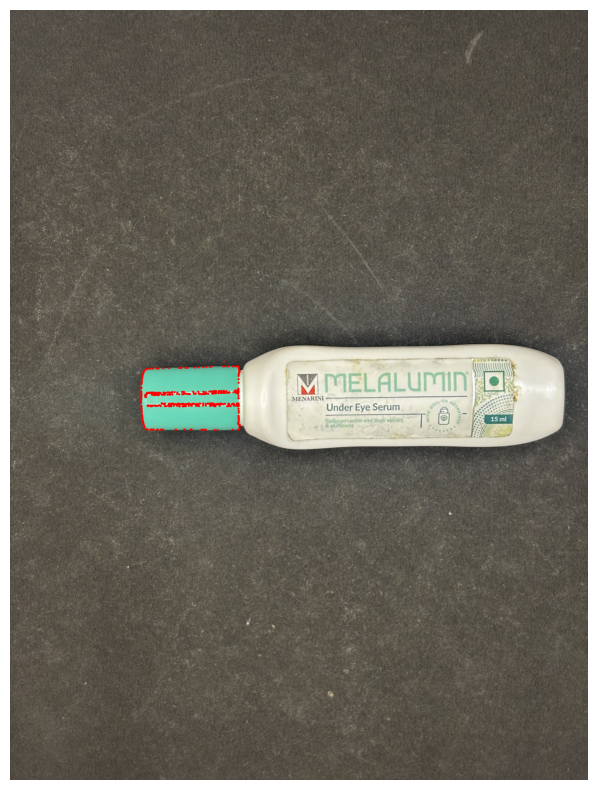

In [28]:
img = cv2.imread(r'c:\Users\melroy.pereira1\OneDrive - Autoliv\Documents\lab_images\IMG_3839.jpeg')
det_cnt = detect_edges_and_dilate(img, blur_kernel=(19, 19), canny_thresh1=10, canny_thresh2=50)

#sort the contours in decreasing order
sorted_contours = sorted(det_cnt, key=cv2.contourArea, reverse=True)

for i, cont in enumerate(sorted_contours[2:3],1):  # t[:3] top 3

    #draw the contours
    cv2.drawContours(img, cont, -1, (0,0,255), 10)

    #Display the position of contour in sorted list
    cv2.putText(img, str(i), (cont[0,0,0], cont[0,0,1]-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255),2)

plt.figure(figsize=[10,10])
plt.imshow(img[:,:,::-1]);plt.axis("off")


((943.219482421875, 2032.555908203125), (333.8883972167969, 516.57275390625), 89.79753875732422)


(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

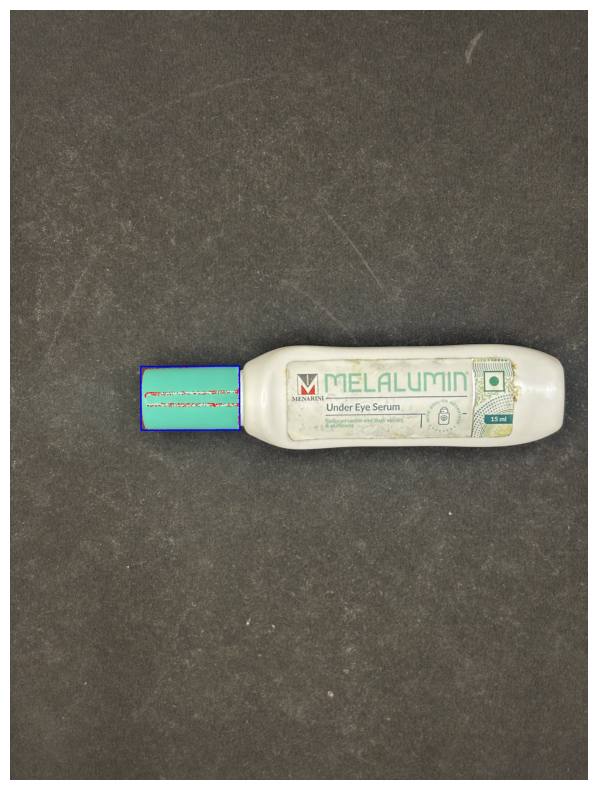

In [37]:
img = cv2.imread(r'c:\Users\melroy.pereira1\OneDrive - Autoliv\Documents\lab_images\IMG_3839.jpeg')
det_cnt = detect_edges_and_dilate(img, blur_kernel=(19, 19), canny_thresh1=10, canny_thresh2=50)
#sort the contours in decreasing order
sorted_contours = sorted(det_cnt, key=cv2.contourArea, reverse=True)

cv2.drawContours(img, sorted_contours[2], -1, (0, 0, 255), 3)  # to check all contours


rect  = cv2. minAreaRect(sorted_contours[2]) 
print(rect)
#convert the rect object to box points  
box = cv2.boxPoints(rect).astype('int')    # min area rect will have angle , this line of code rotate at that angle and find new cordinates [int is used to draw rectangle ]
cv2.drawContours(img,[box], 0, (255,0,0), 5)

plt.figure(figsize=[10,10])
plt.imshow(img[:,:,::-1]);plt.axis("off")

In [ ]:
import cv2
import numpy as np
import os

# Define save folder path and ensure it exists
save_folder = r"C:\projects\ai_quality_app\features\transforms_img"
os.makedirs(save_folder, exist_ok=True)

def detect_edges_and_contours(image, blur_kernel=(3, 3), canny_thresh1=50, canny_thresh2=150, hsv_channel='V'):
    image = image.copy()
    
    # Step 0: Convert to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Select channel based on input
    if hsv_channel == 'H':
        channel = hsv[:, :, 0]
    elif hsv_channel == 'S':
        channel = hsv[:, :, 1]
    else:  # default to 'V'
        channel = hsv[:, :, 2]
    
    # Step 1: Blur to remove noise
    blurred = cv2.GaussianBlur(channel, blur_kernel, 1)

    # Step 2: Canny edge detection
    edges = cv2.Canny(blurred, canny_thresh1, canny_thresh2)

    # Save edges image
    edge_save_path = os.path.join(save_folder, "edges.png")
    cv2.imwrite(edge_save_path, edges)

    # Step 3: Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    return contours



In [59]:
img = cv2.imread(r'c:\Users\melroy.pereira1\OneDrive - Autoliv\Documents\lab_images\IMG_3839.jpeg')
det_cnt = detect_edges_and_contours(img, blur_kernel=(11, 11), canny_thresh1=20, canny_thresh2=60, hsv_channel='S')